In [38]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import itertools

## Input of PIV results, red beads masks and aggregate images

In [7]:
# # open .h5 file containing piv results.
# h5_file_path = "F:/PhD_Franziska/Headon/RedBeads/test_piv/piv_single_aggregate1_downwards_cut1"
# with h5py.File(h5_file_path, "r") as h5f:
#     U = h5f["U"][:] # shape: frame, rows, columns 
#     V = h5f["V"][:]
#     M = h5f["M"][:]
#     xgrid = h5f["xgrid"][:]
#     ygrid = h5f["ygrid"][:]

In [5]:
h5_file_path = "F:/PhD_Franziska/Headon/RedBeads/piv_cut1(2)/total_subregion_piv"
with h5py.File(h5_file_path+"/U_matrix", "r") as h5f:
    U = h5f["matrix"][:] # shape: frame, rows, columns 

with h5py.File(h5_file_path+"/V_matrix", "r") as h5f:
    V = h5f["matrix"][:]

with h5py.File(h5_file_path+"/M_matrix", "r") as h5f:
    M = h5f["matrix"][:]

with h5py.File(h5_file_path+"/xgrid_matrix", "r") as h5f:
    xgrid = h5f["matrix"][:]

with h5py.File(h5_file_path+"/ygrid_matrix", "r") as h5f:
    ygrid = h5f["matrix"][:]

In [3]:
# # open .h5 file of cutted masked red beads images.
# red_beads_file_path = "F:/PhD_Franziska/Headon/RedBeads/mask_red_beads_cut1.h5"
# with h5py.File(red_beads_file_path, "r") as h5f:
#     masked_red_beads = h5f["masked_red_beads"][:]

In [10]:
# open .h5 file for aggregate images and original red beads images
aggregate_file_path = "F:/PhD_Franziska/Headon/RedBeads/subregion_cut1(2).h5"
with h5py.File(aggregate_file_path, "r") as h5f:
    aggregate = h5f["green"][:]
    red_beads = h5f["red"][:]

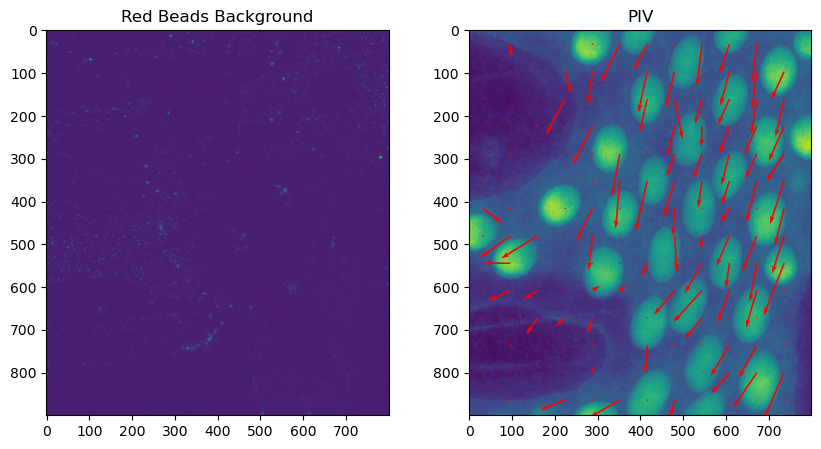

In [28]:
t = 20

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Red Beads Background")
plt.imshow(red_beads[t])

plt.subplot(1, 2, 2)
plt.title("PIV")
plt.imshow(aggregate[300])
plt.quiver(ygrid[t], xgrid[t], U[t], -V[t], color = "red", scale=80)
plt.show()

In [56]:
xgrid[0]

array([[ 32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
         32.],
       [ 96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,
         96.],
       [160., 160., 160., 160., 160., 160., 160., 160., 160., 160., 160.,
        160.],
       [224., 224., 224., 224., 224., 224., 224., 224., 224., 224., 224.,
        224.],
       [288., 288., 288., 288., 288., 288., 288., 288., 288., 288., 288.,
        288.],
       [352., 352., 352., 352., 352., 352., 352., 352., 352., 352., 352.,
        352.],
       [416., 416., 416., 416., 416., 416., 416., 416., 416., 416., 416.,
        416.],
       [480., 480., 480., 480., 480., 480., 480., 480., 480., 480., 480.,
        480.],
       [544., 544., 544., 544., 544., 544., 544., 544., 544., 544., 544.,
        544.],
       [608., 608., 608., 608., 608., 608., 608., 608., 608., 608., 608.,
        608.],
       [672., 672., 672., 672., 672., 672., 672., 672., 672., 672., 672.,
        672.],
       [736., 736., 7

## Extract one single aggregate and average the direction arrows surrounding it

In [68]:
t = 10 

# Determine the center of the aggregate
center = [450, 690]

def select_neighbour_region(center, t, dist, xgrid, ygrid, U, V):
    ## Function select the vectors in the surrondings of given center [x0, y0]. 
    
    # Find out the arrows in the surrounding of the center of aggregate
    # Define the region of surrounding and found the coordinates inside the surrounding area.
    neighbour_region = [[i for i in range(center[0]-dist, center[0]+dist)],
                       [i for i in range(center[1]-dist, center[1]+dist)]]
    neighbour_xgrid = np.unique(xgrid[0][np.isin(xgrid[0], neighbour_region[0])])
    neighbour_ygrid = np.unique(ygrid[0][np.isin(ygrid[0], neighbour_region[1])])
    # The grid of considered vectors. 
    grid_combi = [list(comb) for comb in itertools.product(neighbour_xgrid, neighbour_ygrid)]
    final_select_xgrid = [comb[0] for comb in grid_combi]
    final_select_ygrid = [comb[1] for comb in grid_combi]
    
    # Determine the indices of the grids in order to find the corresponding U and V elements.
    row_indices = [np.where(xgrid[0][:, 0] == number)[0][0] for number in final_select_xgrid]
    col_indices = [np.where(ygrid[0][0, :] == number)[0][0] for number in final_select_ygrid]
    vec_indeces = [[x, y] for x, y in zip(row_indices, col_indices)]
    # Pick out the vector directions from U and V based on the vec_indices list. 
    select_U = [U[t][row, col] for row, col in vec_indeces]
    select_V = [V[t][row, col] for row, col in vec_indeces]

    return np.array(final_select_xgrid), np.array(final_select_ygrid), np.array(select_U), np.array(select_V)

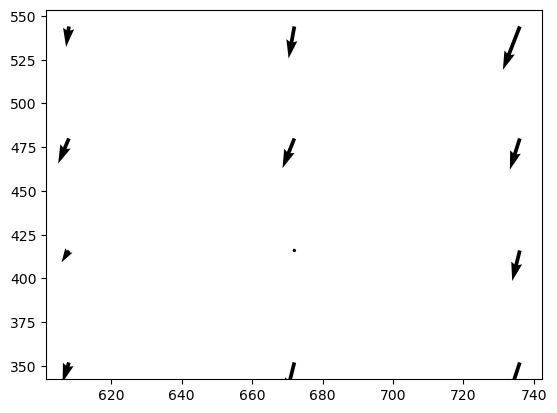

In [69]:
x, y, u, v = select_neighbour_region([450, 690], 20, 100, xgrid, ygrid, U, V)
plt.quiver(y, x, u,-v)

1


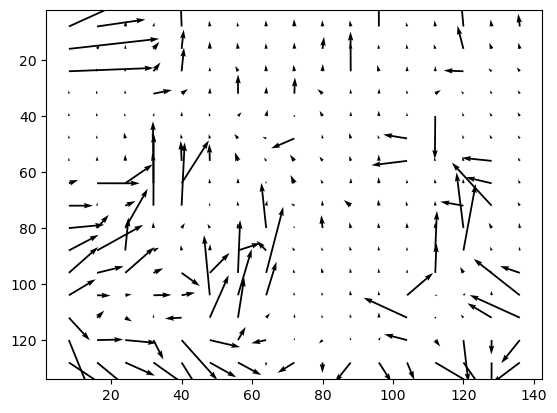

In [23]:
U_mid, V_mid, _ = vector_avg(U, V, M, 5, 15)
plt.quiver(ygrid[0], xgrid[0], U_mid, V_mid)
plt.gca().invert_yaxis()

## Cut the regions that are not covered by skin tissue. Those are NaN in red beads masks. 

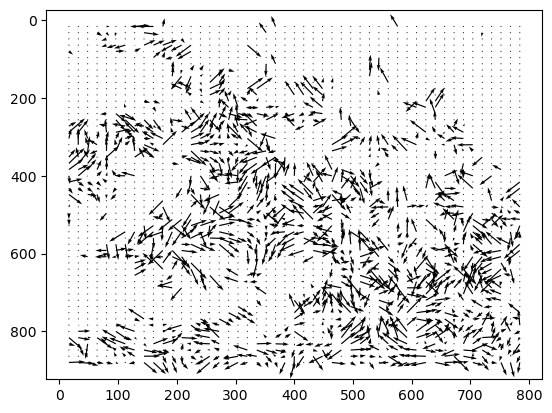

In [8]:
# Alternative 1: Use index from grid matrix, check if the correspoding position has in red beads mask value NaN.
# If the value is NaN, then find out the index of this position in grid matrices. 
# Then set the vector values with this index to NaN. 

xgrid_matrix = xgrid[0]
ygrid_matrix = ygrid[0]
red_bead_mask = sub_frame[0]
U_matrix = U[0]
V_matrix = V[0]

# Find out the index for position from grid matrix which corresponds to NaN in masks. 
for i in range(xgrid_matrix.shape[0]):
    mask_value = red_bead_mask[xgrid_matrix[i,:].astype(int), ygrid_matrix[i,:].astype(int)]
    is_nan = np.isnan(mask_value)
    col_index = np.where(is_nan)[0]
    row_index = np.full(len(col_index), i)

    # Change the vector value with those index to NaN. 
    U_matrix[row_index, col_index] = np.nan
    V_matrix[row_index, col_index] = np.nan

# Plot the cutted vector field.
plt.quiver(ygrid_matrix, xgrid_matrix, U_matrix, V_matrix)
plt.gca().invert_yaxis()

In [8]:
# Write the above processing as function.
def piv_mask(t, xgrid_set, ygrid_set, red_bead_set, U, V): 
    
    xgrid_matrix = xgrid[t]
    ygrid_matrix = ygrid[t]
    red_bead_mask = red_bead_set[t]
    U_matrix = U[t]
    V_matrix = V[t]
    
    # Find out the index for position from grid matrix which corresponds to NaN in masks. 
    for i in range(xgrid_matrix.shape[0]):
        mask_value = red_bead_mask[xgrid_matrix[i,:].astype(int), ygrid_matrix[i,:].astype(int)]
        is_nan = np.isnan(mask_value)
        col_index = np.where(is_nan)[0]
        row_index = np.full(len(col_index), i)
    
        # Change the vector value with those index to NaN. 
        U_matrix[row_index, col_index] = np.nan
        V_matrix[row_index, col_index] = np.nan
        
    return ygrid_matrix, xgrid_matrix, U_matrix, V_matrix

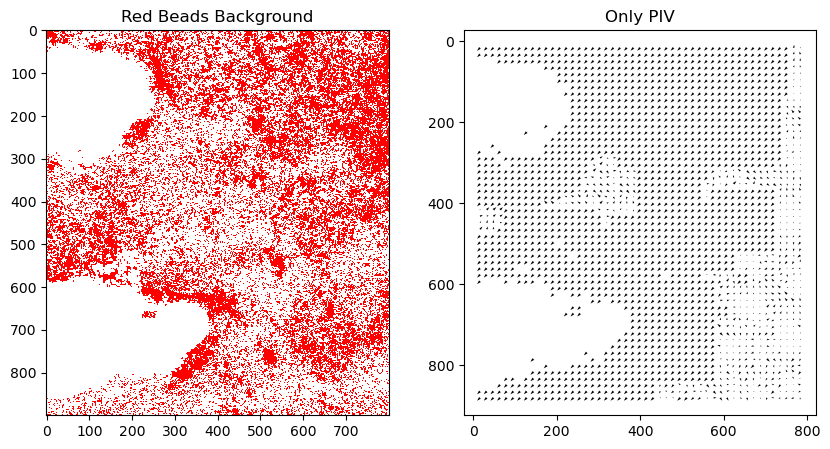

In [10]:
ygrid_matrix, xgrid_matrix, U_matrix, V_matrix = piv_mask(0, xgrid, ygrid, sub_frame, U, V)

t = 0

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Red Beads Background")
plt.imshow(sub_frame[t], cmap= ListedColormap(["white", "red"]))

plt.subplot(1, 2, 2)
plt.title("Only PIV")
plt.quiver(ygrid_matrix, xgrid_matrix, U_matrix, V_matrix)
plt.gca().invert_yaxis()
plt.show()

In [83]:
# Alternative 2: Get all index of NaN in mask. Find if the index appears in grid matrix.
# If appears, find out the position in grid matrices.
# Set the vector values with those positions to NaN. 

# xgrid_matrix = xgrid[0]
# ygrid_matrix = ygrid[0]
# red_bead_mask = sub_frame[0]
# U_matrix = U[0]
# V_matrix = V[0]

# # Find out the positions of NaN in red bead mask 
